In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/최종데이터파일.csv",encoding='cp949',index_col=0) 
편의점최종=pd.merge(클러스터링,편의점).set_index('상권코드',drop=True)


In [2]:
매출이낮은상권=편의점최종[편의점최종['분류']==0]
매출이높은상권=편의점최종[편의점최종['분류']==1]
매출이중간인상권=편의점최종[편의점최종['분류']==2]


In [3]:
print(str(매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max()))
print(str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max()))
print(str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max()))
 


5991840.25에서191087879.585
191457477.605에서363686576.185
366001786.015에서1029480596.395


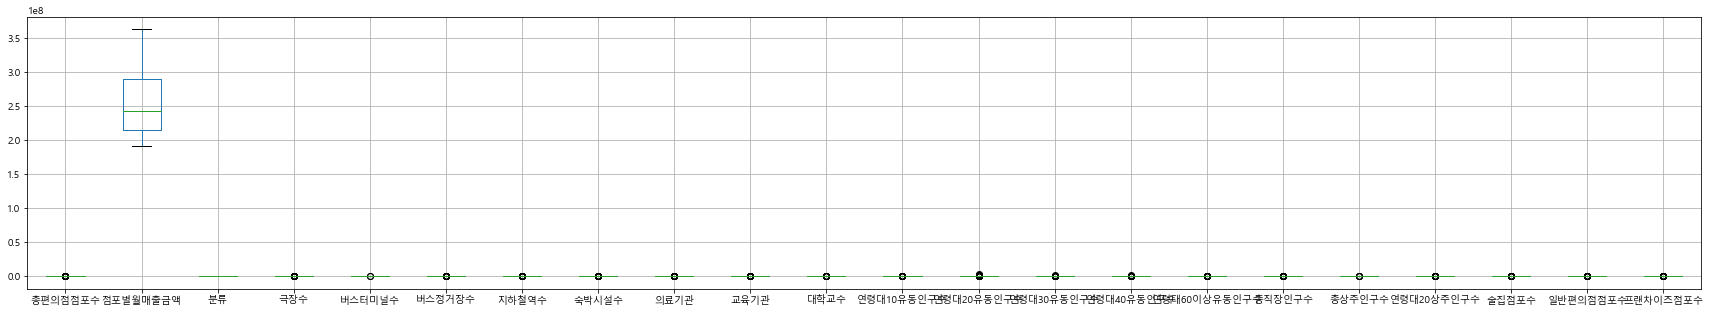

In [4]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이중간인상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [6]:
매출이중간인상권.columns

Index(['총편의점점포수', '점포별월매출금액', '분류', '극장수', '버스터미널수', '버스정거장수', '지하철역수',
       '숙박시설수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수',
       '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수', '생존률'],
      dtype='object')

In [218]:
cols=[ '점포별월매출금액', '극장수', '버스터미널수', '버스정거장수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수',
       '연령대20상주인구수','생존률'  ]
X=매출이중간인상권[cols] #독립변수
y=매출이중간인상권['생존률'] #종속변수]
X.to_csv("c:/data/project/team/revised/매출중간.csv",encoding='cp949')

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


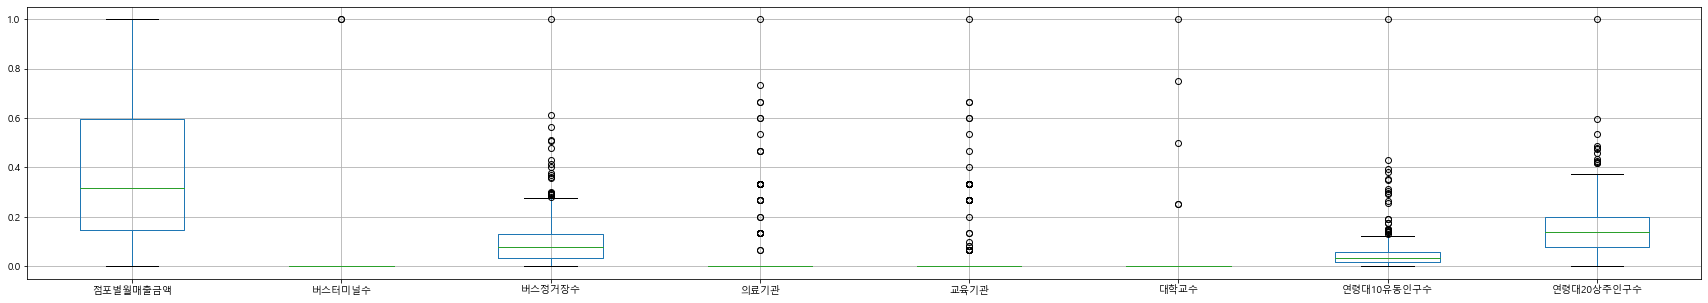

In [215]:
# 편의점.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
X_train_scaled.boxplot(figsize=(30,5))

In [216]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              167.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                    1.94e-98
Time:                        16:37:50   Log-Likelihood:                          1.8549
No. Observations:                 271   AIC:                                      12.29
Df Residuals:                     263   BIC:                                      41.11
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
점포별월매출금액       0.5362      0.043     12.361      0.000       0.451       0.622
버스터미널수        -0.1312      0.178     -0.738      0.461      -0.481       0.219
버스정거장수         0.9261      0.140      6.607      0.000       0.650       1.202
의료기관          -0.1500      0.104     -1.437      0.152      -0.355       0.056
교육기관           0.0918      0.105      0.872      0.384      -0.116       0.299
대학교수           0.1628      0.180      0.906      0.366      -0.191       0.516
연령대10유동인구수    -0.3105      0.204     -1.522      0.129      -0.712       0.091
연령대20상주인구수     1.3165      0.115     11.484      0.000       1.091       1.542
==============================================================================
Omnibus:                       11.129   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.376
Skew:                          -0.456   Prob(JB):                      0.00339
Kurtosis:                       3.418   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
7,2.336709,연령대20상주인구수
6,2.264022,버스정거장수
5,2.138103,연령대10유동인구수
4,1.910129,점포별월매출금액
3,1.243239,교육기관
2,1.241325,의료기관
1,1.062890,버스터미널수
0,1.050415,대학교수
